In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [10]:
# Load the dataset
data = pd.read_csv("/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv", parse_dates=["Date"], index_col="Date")

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [12]:
# Selecting the column to predict (Close Price)
close_prices = data["Close"].values.reshape(-1, 1)

In [13]:
# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [14]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 50  # Using 50 days of data to predict next day
X, y = create_sequences(scaled_data, seq_length)

In [15]:
# Split data into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [16]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 1.7343e-04 - val_loss: 0.0072
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.8280e-06 - val_loss: 0.0056
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.4152e-06 - val_loss: 0.0046
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.7230e-06 - val_loss: 0.0036
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.8397e-06 - val_loss: 0.0040
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.8939e-06 - val_loss: 0.0038
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.4283e-06 - val_loss: 0.0029
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.9409e-06 - val_loss: 0.0017
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.6403e-06 - val_loss: 0.0017
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 3.7492e-06 - val_loss: 0.0023
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.5912e-06 - val_loss: 0.0018
Epoch 12/20
73/73 ━

In [18]:
# Predict future values
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


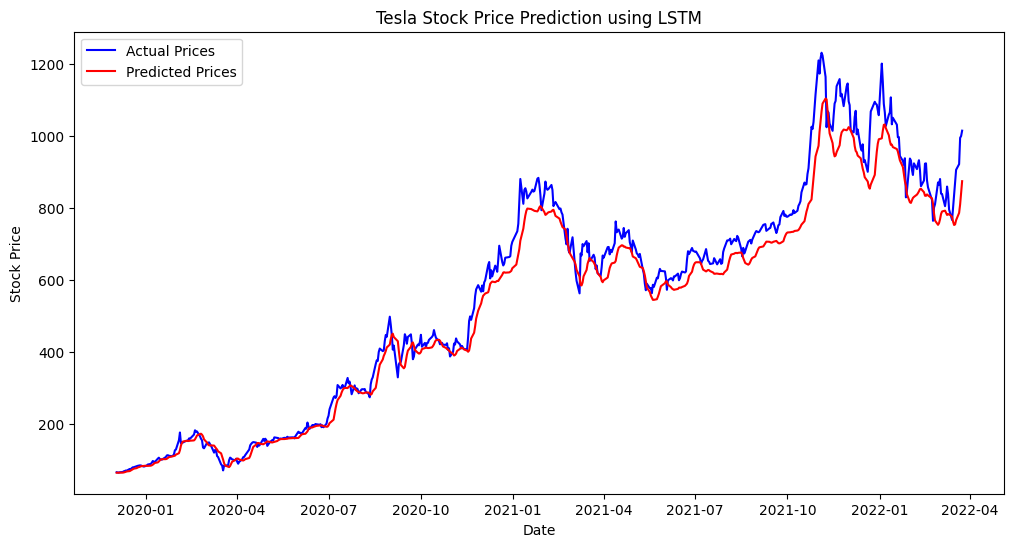

In [19]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label="Actual Prices", color='blue')
plt.plot(data.index[-len(y_pred):], y_pred, label="Predicted Prices", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price Prediction using LSTM")
plt.legend()
plt.show()

 # Additional Charts

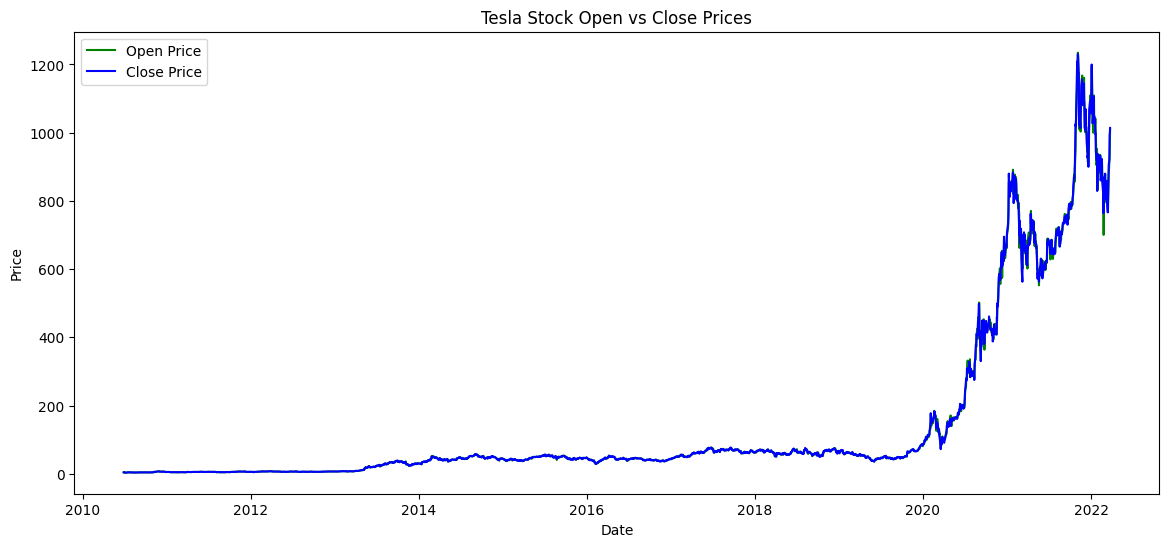

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Open'], label='Open Price', color='green')
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla Stock Open vs Close Prices")
plt.legend()
plt.show()

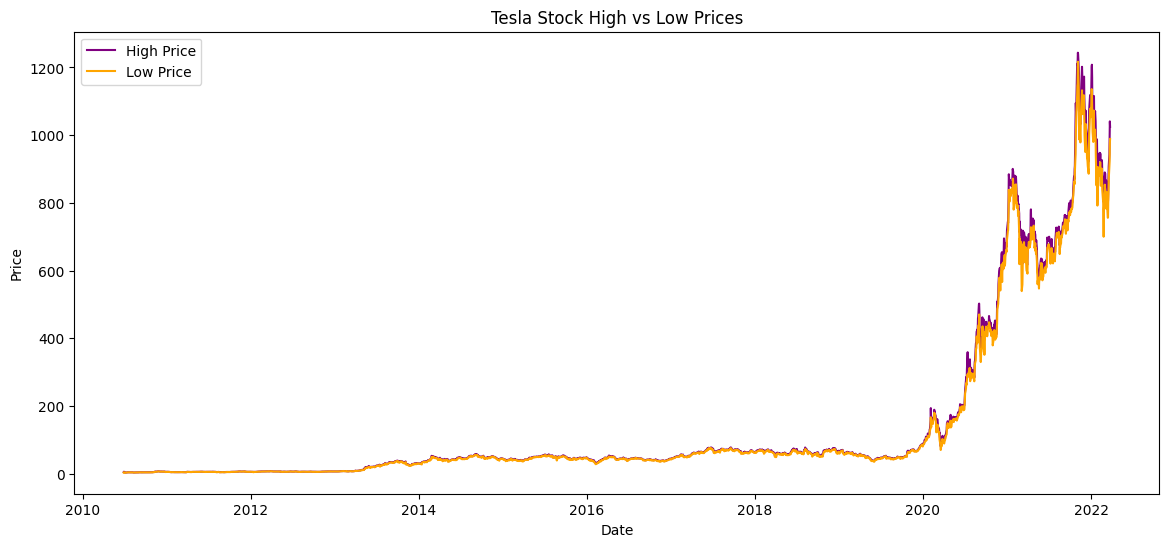

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['High'], label='High Price', color='purple')
plt.plot(data.index, data['Low'], label='Low Price', color='orange')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla Stock High vs Low Prices")
plt.legend()
plt.show()

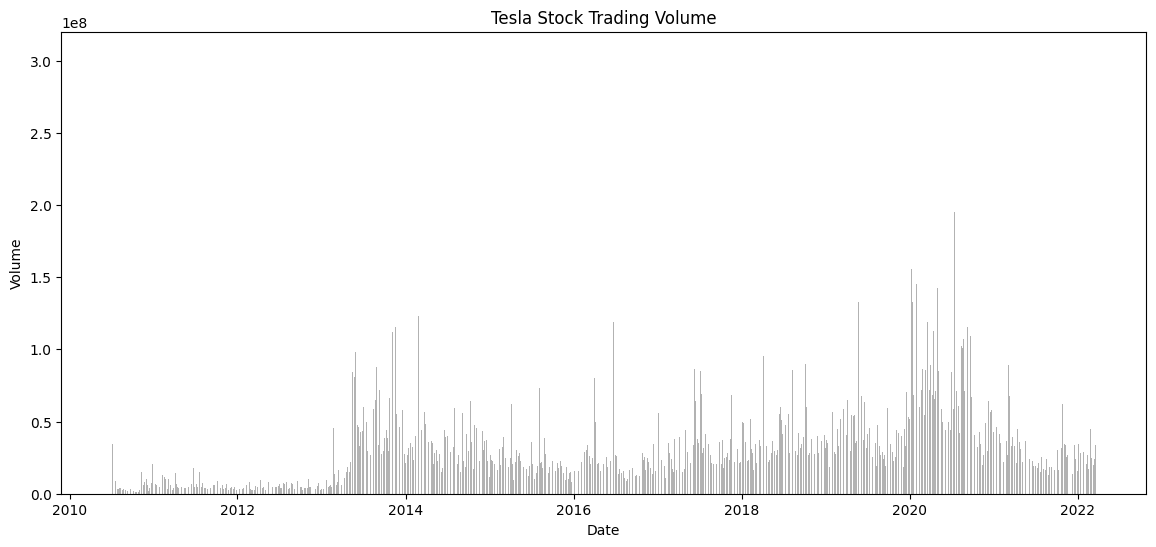

In [22]:
plt.figure(figsize=(14, 6))
plt.bar(data.index, data['Volume'], color='gray', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Tesla Stock Trading Volume")
plt.show()
